In [1]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### 加载数据集

In [2]:
data_dir = 'datasets/ml-100k/u.data' 
N, M, data_list, _ = load_data(file_dir=data_dir)
print(' data length: %d \n user number: %d \n item number: %d' %(len(data_list),N,M))

 data length: 100000 
 user number: 943 
 item number: 1682


### 分割数据集

In [3]:
train_list, test_list = train_test_split(data_list,test_size=0.2)
print ('train length: %d \n test length: %d' %(len(train_list),len(test_list)))

train length: 80000 
 test length: 20000


### 将 list 转换成 矩阵

In [4]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)

### 参数设置

In [5]:
learning_rate = 0.005
lamda_regularizer = 0.1
max_iteration = 100
K = 10

### 1. 非负矩阵分解 （NMF）

 step:0 
 loss:548312.4604,mae:3.5208,rmse:3.6974,recall:0.0194,precision:0.0411
 step:10 
 loss:35131.3378,mae:0.7818,rmse:1.0062,recall:0.0420,precision:0.0892
 step:20 
 loss:28978.9419,mae:0.7558,rmse:0.9704,recall:0.0480,precision:0.1018
 step:30 
 loss:25430.7312,mae:0.7556,rmse:0.9713,recall:0.0476,precision:0.1010
 step:40 
 loss:23498.9476,mae:0.7616,rmse:0.9802,recall:0.0465,precision:0.0986
 step:50 
 loss:22322.6017,mae:0.7669,rmse:0.9889,recall:0.0432,precision:0.0917
 step:60 
 loss:21531.2193,mae:0.7714,rmse:0.9965,recall:0.0399,precision:0.0847
 step:70 
 loss:20962.5098,mae:0.7753,rmse:1.0032,recall:0.0382,precision:0.0810
 step:80 
 loss:20535.4252,mae:0.7789,rmse:1.0093,recall:0.0353,precision:0.0750
 step:90 
 loss:20203.9762,mae:0.7823,rmse:1.0151,recall:0.0323,precision:0.0684
 end. 
 loss:19963.5905,mae:0.7851,rmse:1.0199,recall:0.0303,precision:0.0643
MAE:0.7851;RMSE:1.0199;Recall:0.0303;Precision:0.0643


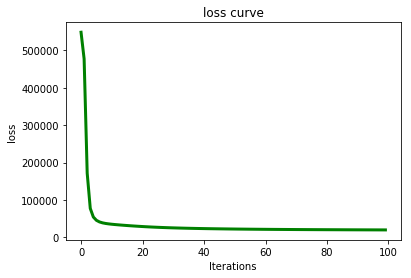

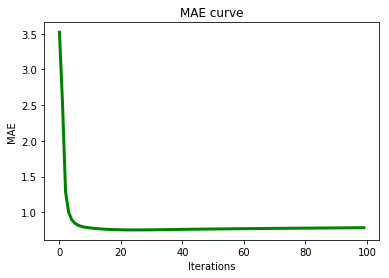

In [6]:
from nmf import *
model = nmf_sgd(train_list=train_list, 
                test_list=test_list, 
                N=N, 
                M=M,
                K=K,
                learning_rate=learning_rate,
                max_iteration=max_iteration)
P, Q, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1],records_array[:,4][-1]))

figure(values_list=records_array[:,0],name='loss')
figure(values_list=records_array[:,1],name='MAE')

 step:0 
 loss:9194122.4042,mae:3.8249,rmse:5.6438,recall:0.0266,precision:0.0564
 step:10 
 loss:9143999027.7197,mae:3.7625,rmse:15.1472,recall:0.0280,precision:0.0594
 step:20 
 loss:98169739.3653,mae:3.4375,rmse:12.9892,recall:0.0517,precision:0.1097
 step:30 
 loss:18513774.8086,mae:4.1281,rmse:11.4238,recall:0.0323,precision:0.0684
 step:40 
 loss:1345592.3056,mae:3.5669,rmse:4.0911,recall:0.0317,precision:0.0672
 step:50 
 loss:39891840.0284,mae:3.6264,rmse:5.1317,recall:0.0257,precision:0.0546
 step:60 
 loss:2933480.4894,mae:3.8836,rmse:6.7388,recall:0.0238,precision:0.0505
 step:70 
 loss:8005616.6484,mae:3.7400,rmse:6.2012,recall:0.0186,precision:0.0394
 step:80 
 loss:1671583.0481,mae:3.5415,rmse:3.7491,recall:0.0220,precision:0.0467
 step:90 
 loss:9058149.8021,mae:3.7001,rmse:9.6247,recall:0.0265,precision:0.0561
 end. 
 loss:1659034.0677,mae:3.5469,rmse:4.1665,recall:0.0291,precision:0.0617
MAE:3.5469;RMSE:4.1665;Recall:0.0291;Precision:0.0617


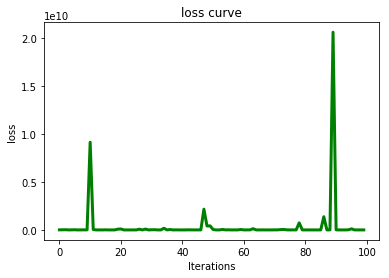

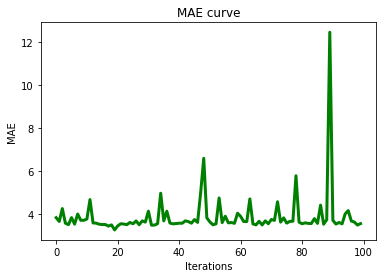

In [7]:
model = nmf_mult(train_list=train_list, 
                 test_list=test_list, 
                 N=N, 
                 M=M,
                 K=K,
                 max_iteration=max_iteration)
P, Q, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1],records_array[:,4][-1]))

figure(values_list=records_array[:,0],name='loss')
figure(values_list=records_array[:,1],name='MAE')

In [8]:
# sklearn 自带的 NMF 算法
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
W = model.fit_transform(train_mat)
H = model.components_

def prediction(P, Q):
    N,K = P.shape
    M,K = Q.shape

    rating_list=[]
    for u in range(N):
        u_rating = np.sum(P[u,:]*Q, axis=1)
        rating_list.append(u_rating)
    r_pred = np.array(rating_list)
    return r_pred

# 预测评分
user = np.array(train_list)[:,0].astype(np.int16)
item = np.array(train_list)[:,1].astype(np.int16)
rating_true = np.array(train_list)[:,2]
rating_pred = np.sum(W[user,:]*H.T[item,:],axis=1)
loss = np.sum((rating_true-rating_pred)**2)
pred_mat = prediction(W, H.T)

# 评估算法
mae, rmse, recall, precision = evaluation(pred_mat, train_mat, test_mat)
print(loss, mae, rmse, recall, precision)

513535.2602889189 2.368174745763627 2.6410477369964793 0.1557 0.33022269353128314
